# Data selection

This selection is done as input to our first attempt to use tigramite algorithm.

## 1. Initial setup

In [1]:
# Packages.
import sys
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# My repository.
repository = "/home/alex/Dropbox/repositories/doctoral_thesis/libraries/"

In [3]:
# Include once my repository in the path for searching libraries.
if repository not in sys.path:
    sys.path.append(repository)
    
# Import my libraries.
import modis.aod as aer
import datasus.tools as sus

import maps.municipalities 

**Incorporate ongoing changes**

**===========================**

In [11]:
importlib.reload(aer)
importlib.reload(sus)
importlib.reload(maps.municipalities);

**===========================**

In [5]:
# Folder where the selected data will be put.
output_folder = "/home/alex/Dropbox/data_selection/"

## 2. Data from SUS

In [6]:
# Where the data live.
directory1 = "/media/alex/ALEXDATA/data_sets/HEALTH/HOSPITALIZATION/MT/"

# Read all diseases as a pandas data frame.
SUS = sus.data_frame(directory1)

100% (207 of 207) |######################| Elapsed Time: 0:11:34 Time:  0:11:34


## 3 Data from MODIS

In [7]:
# Directory containing data.
directory2 = "/media/alex/ALEXDATA/data_sets/MODIS/AOD/"

In [8]:
# Read data from TERRA satellite (by default) as xarray DataArray classes.
AOD, lon, lat = aer.read_data_set_xarray(directory2)

## 4 Data from IBGE

In [9]:
MUNICIPALITIES = pd.read_csv("./municipalities.txt", index_col=0)

## 5. Entire Mato Grosso state

In [10]:
# Retrive longitude and latitude for all municipalities in Mato Grosso.
mask = MUNICIPALITIES.NM_UF == "MATO GROSSO"
hospital_locs = MUNICIPALITIES.loc[mask, ["LONG", "LAT"]].values.tolist()

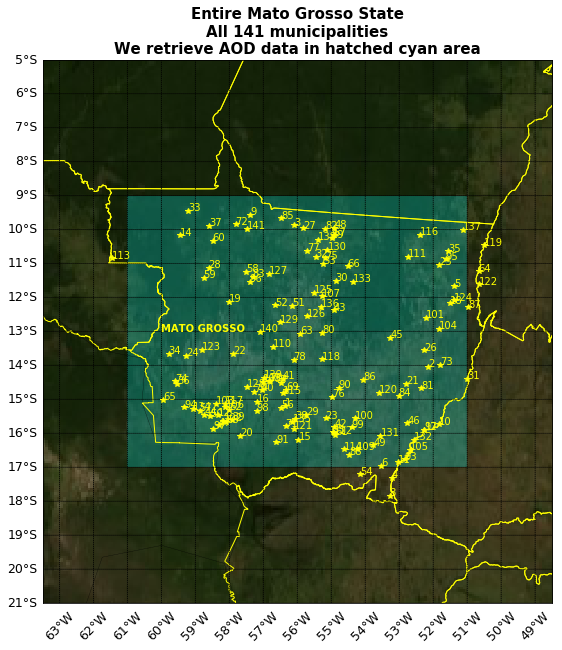

In [16]:
# Mato Grosso map with localizations of hospitals.
locations_labels = [str(l) for l in range(1, len(hospital_locs) + 1)]

x = maps.municipalities.make_map(
    hospital_locs, locations_labels, 
    loni=-63.5, lonf=-48.5, lati=-21, latf=-5, dlon=1, dlat=1,
    title="Entire Mato Grosso State\nAll 141 municipalities\nWe retrieve AOD data in hatched cyan area", 
    text="MATO GROSSO", 
    text_loc=(-60, -13), 
    region=True, region_loni=-61, region_lonf=-51, region_lati=-17, region_latf=-9,
    save_fig=True, 
    fig_path=output_folder, fig_name="mato_grosso");

### 5.1 All respiratory diseases for people of all ages

In [17]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J"],
                                   time_ranges=[["2000", "2019"]])

In [18]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [19]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "mato_grosso1.txt", sep=",", columns=["COUNT"], index_label="TIME")

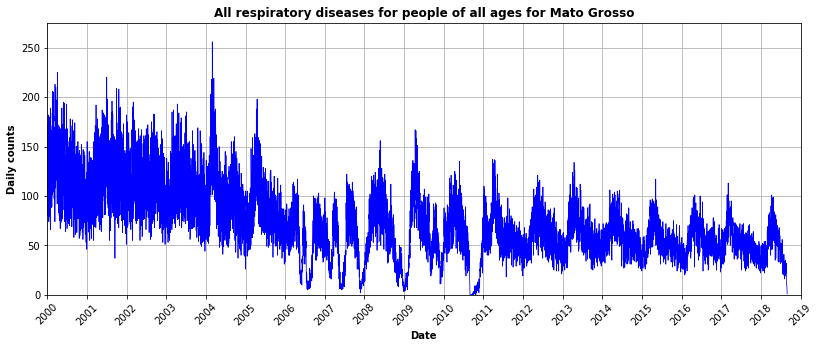

In [20]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("All respiratory diseases for people of all ages for Mato Grosso", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 275))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "mato_grosso1.jpg", dpi=400, bbox_inches="tight")

### 5.2 Only children under 5 years with asthma (J45), influenza and pneumonia (J10-J18)

In [21]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J45", "J10", "J11", "J12", "J13",
                                                  "J14", "J15", "J16", "J17", "J18"],
                                   age_ranges=[[0, 5]], 
                                   time_ranges=[["2000", "2019"]])

In [22]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [23]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "mato_grosso2.txt", sep=",", columns=["COUNT"], index_label="TIME")

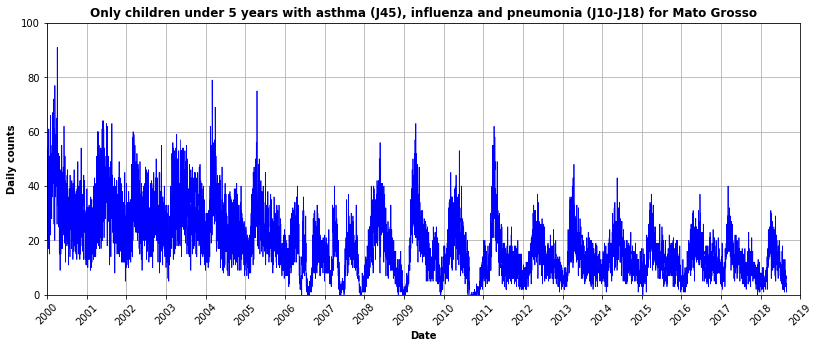

In [24]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Only children under 5 years with asthma (J45), influenza and pneumonia (J10-J18) " + \
          "for Mato Grosso", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 100))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "mato_grosso2.jpg", dpi=400, bbox_inches="tight")

### 5.3 Elderly over 60 years with chronic obstructive pulmonary diseases (J44)

In [25]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J44"],
                                   age_ranges=[[60, 120]], 
                                   time_ranges=[["2000", "2019"]])

In [26]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [27]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "mato_grosso3.txt", sep=",", columns=["COUNT"], index_label="TIME")

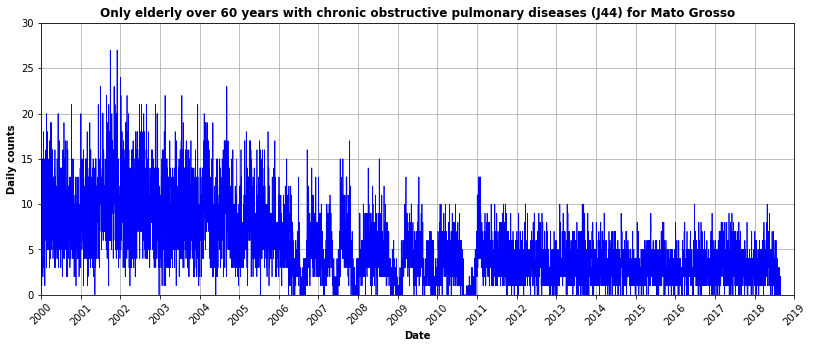

In [28]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Only elderly over 60 years with chronic obstructive pulmonary diseases (J44) " + \
          "for Mato Grosso", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 30))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "mato_grosso3.jpg", dpi=400, bbox_inches="tight")

### 5.4 Aerosol optical depth

In [29]:
# See figure above to visualize the selected region.
AOD_sel = AOD.sel(lon=slice(-61, -51), lat=slice(-17, -9), time=slice("2000", "2018")).\
          mean(dim=["lon", "lat"])

In [30]:
# Extract information. I do not understant the below warning message :(
AOD_time = pd.to_datetime(AOD_sel.time.values)
AOD_values = AOD_sel.values

/home/alex/anaconda3/envs/climate36/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [31]:
# Let's make a pandas data frame in order to fill with nans the holes in the daily time series.
AOD_df = pd.DataFrame(AOD_values, index=AOD_time, columns=["AOD"])
daily_index = pd.date_range(AOD_df.index[0], AOD_df.index[-1], freq="D")
AOD_df = AOD_df.reindex(daily_index, fill_value=np.nan)

In [32]:
# Export data to a txt file.
AOD_df.to_csv(output_folder + "mato_grosso4.txt", sep=",", columns=["AOD"], index_label="TIME")

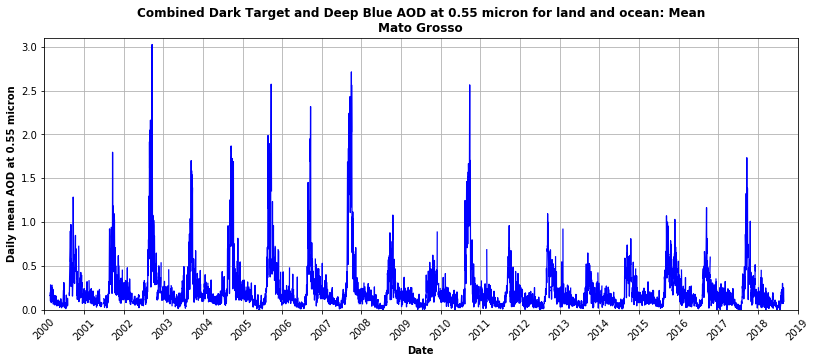

In [33]:
# Time series of AOD.
plt.figure(figsize=(13.5, 5))

# Plots.
plt.plot(AOD_df.index, AOD_df.values, "-b", linewidth=1.25)
plt.title(AOD.long_name + "\n" + "Mato Grosso", fontweight="bold")

# Legends.
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily mean AOD at 0.55 micron", fontweight="bold")

# Adjustments.
plt.ylim((0, 3.1))
plt.xlim((pd.Timestamp("2000"),pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "mato_grosso4.jpg", dpi=400, bbox_inches="tight")

### 5.5 Cardiovascular diseases (I-00 to I-99) similar for all ages

In [34]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["I"],
                                   time_ranges=[["2000", "2019"]])

In [35]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [36]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "mato_grosso5.txt", sep=",", columns=["COUNT"], index_label="TIME")

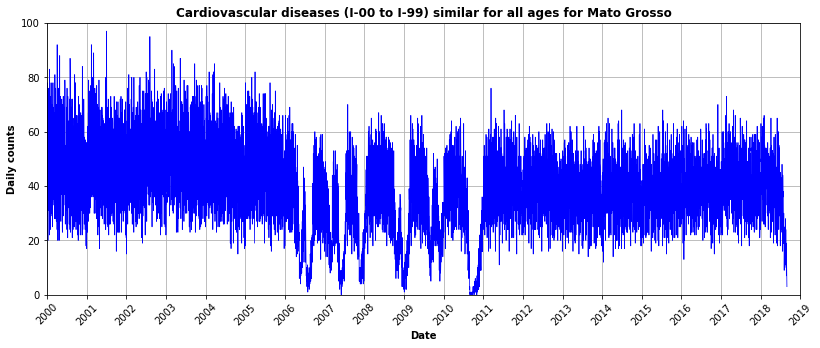

In [37]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Cardiovascular diseases (I-00 to I-99) similar for all ages " + \
          "for Mato Grosso", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 100))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "mato_grosso5.jpg", dpi=400, bbox_inches="tight")

## 6. Alta Floresta region

In [38]:
# Municipalities close to Alta Floresta. See "municipalities.txt" file for the names.
# Alta Foresta, Apiacás, Nova Bandeirantes, Nova Monte Verde, Paranaíta, Carlinda and 
# Nova Canaã do Norte
hospital_loc_codes = ["510025", "510080", "510615", "510895", "510629", "510279", "510621"]

In [39]:
# Retrive longitude, latitude, and labels for the selected locations close to Alta Floresta.
hospital_labels = []
hospital_locs = []

for hospital_loc_code in hospital_loc_codes:
    
    mask = MUNICIPALITIES.CD_GEOCODM_SUS == int(hospital_loc_code)
    hospital_labels.append(MUNICIPALITIES.NM_MUNICIP[mask].values[0])
    hospital_locs.append(MUNICIPALITIES.loc[mask, ["LONG", "LAT"]].values.reshape(-1, ))

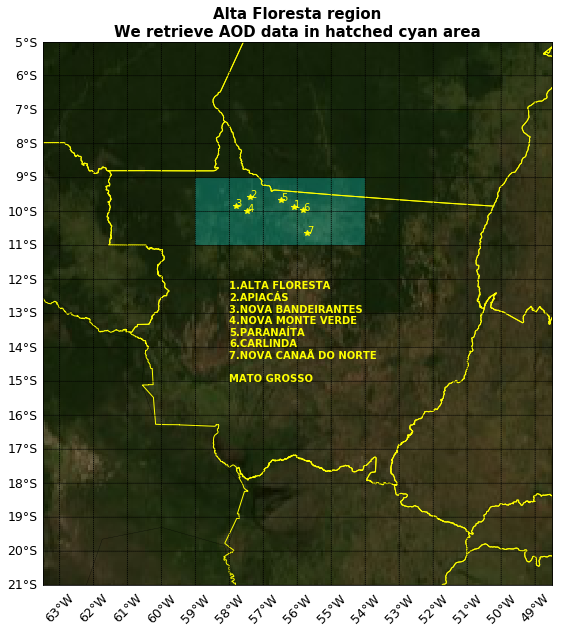

In [40]:
# Mato Grosso map with localizations of hospitals.
locations_labels = [str(l) for l in range(1, len(hospital_loc_codes) + 1)]

x = maps.municipalities.make_map(
    hospital_locs, locations_labels, 
    loni=-63.5, lonf=-48.5, lati=-21, latf=-5, dlon=1, dlat=1,
    title="Alta Floresta region\nWe retrieve AOD data in hatched cyan area", 
    text="1.ALTA FLORESTA\n2.APIACÁS\n3.NOVA BANDEIRANTES\n" + \
    "4.NOVA MONTE VERDE\n5.PARANAÍTA\n6.CARLINDA\n7.NOVA CANAÃ DO NORTE\n\nMATO GROSSO", 
    text_loc=(-58, -15), 
    region=True, region_loni=-59, region_lonf=-54, region_lati=-11, region_latf=-9,
    save_fig=True, 
    fig_path=output_folder, fig_name="alta_floresta");

### 6.1 All respiratory diseases for people of all ages

In [41]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J"],
                                   time_ranges=[["2000", "2019"]],
                                   hospital_loc_codes=hospital_loc_codes)

In [42]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [43]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "alta_floresta1.txt", sep=",", columns=["COUNT"], index_label="TIME")

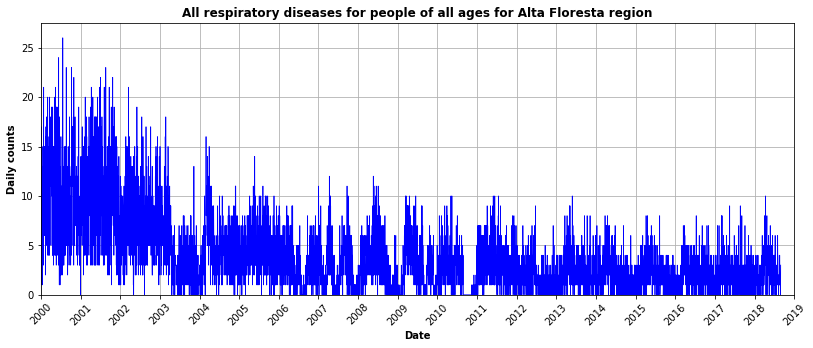

In [44]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("All respiratory diseases for people of all ages for Alta Floresta region", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 27.5))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "alta_floresta1.jpg", dpi=400, bbox_inches="tight")

### 6.2 Only children under 5 years with asthma (J45), influenza and pneumonia (J10-J18)

In [45]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J45", "J10", "J11", "J12", "J13",
                                                  "J14", "J15", "J16", "J17", "J18"],
                                   age_ranges=[[0, 5]], 
                                   time_ranges=[["2000", "2019"]],
                                   hospital_loc_codes=hospital_loc_codes)

In [46]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [47]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "alta_floresta2.txt", sep=",", columns=["COUNT"], index_label="TIME")

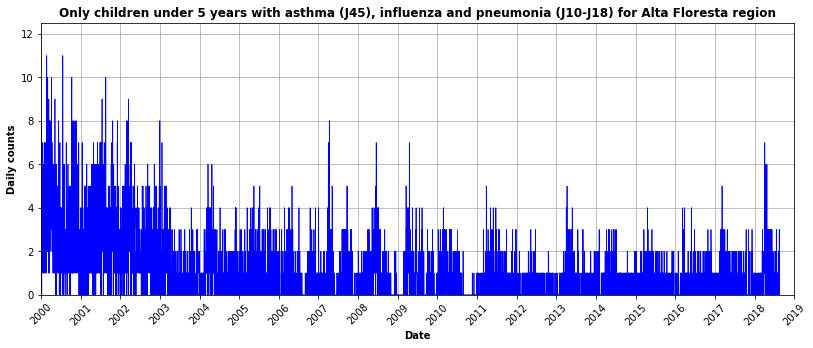

In [48]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Only children under 5 years with asthma (J45), influenza and pneumonia (J10-J18) " + \
          "for Alta Floresta region", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 12.5))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "alta_floresta2.jpg", dpi=400, bbox_inches="tight")

### 6.3 Elderly over 60 years with chronic obstructive pulmonary diseases (J44)

In [49]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["J44"],
                                   age_ranges=[[60, 120]], 
                                   time_ranges=[["2000", "2019"]], 
                                   hospital_loc_codes=hospital_loc_codes)

In [50]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [51]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "alta_floresta3.txt", sep=",", columns=["COUNT"], index_label="TIME")

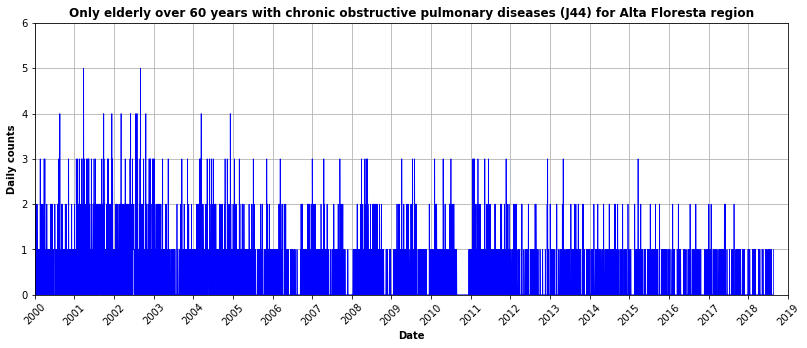

In [52]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Only elderly over 60 years with chronic obstructive pulmonary diseases (J44) " + \
          "for Alta Floresta region", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 6))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "alta_floresta3.jpg", dpi=400, bbox_inches="tight")

### 6.4 Aerosol optical depth

In [53]:
# See figure above to visualize the selected region.
AOD_sel = AOD.sel(lon=slice(-59, -54), lat=slice(-11, -9), time=slice("2000", "2018")).\
          mean(dim=["lon", "lat"])

In [54]:
# Extract information. I do not understant the below warning message :(
AOD_time = pd.to_datetime(AOD_sel.time.values)
AOD_values = AOD_sel.values

In [55]:
# Let's make a pandas data frame in order to fill with nans the holes in the daily time series.
AOD_df = pd.DataFrame(AOD_values, index=AOD_time, columns=["AOD"])
daily_index = pd.date_range(AOD_df.index[0], AOD_df.index[-1], freq="D")
AOD_df = AOD_df.reindex(daily_index, fill_value=np.nan)

In [56]:
# Export data to a txt file.
AOD_df.to_csv(output_folder + "alta_floresta4.txt", sep=",", columns=["AOD"], index_label="TIME")

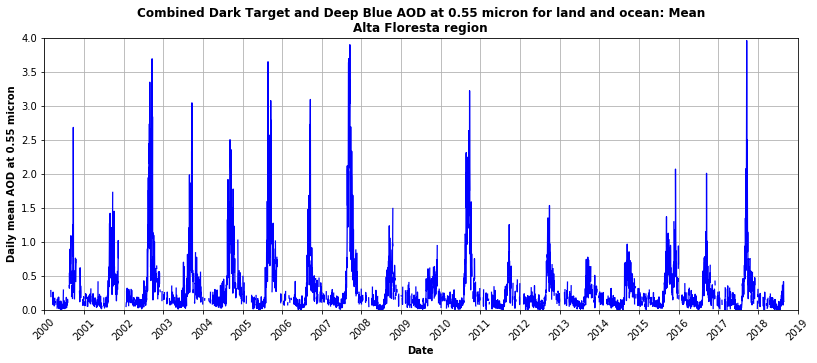

In [57]:
# Time series of AOD.
plt.figure(figsize=(13.5, 5))

# Plots.
plt.plot(AOD_df.index, AOD_df.values, "-b", linewidth=1.25)
plt.title(AOD.long_name + "\n" + "Alta Floresta region", fontweight="bold")

# Legends.
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily mean AOD at 0.55 micron", fontweight="bold")

# Adjustments.
plt.ylim((0, 4))
plt.xlim((pd.Timestamp("2000"),pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "alta_floresta4.jpg", dpi=400, bbox_inches="tight")

### 6.5 Cardiovascular diseases (I-00 to I-99) similar for all ages

In [58]:
# Selection.
SUS_sel = sus.data_frame_selection(SUS, 
                                   disease_codes=["I"],
                                   time_ranges=[["2000", "2019"]], 
                                   hospital_loc_codes=hospital_loc_codes)

In [59]:
# Counting the sum over all municipalities of Mato Grosso.
COUNT = sus.make_counts(SUS_sel)

In [60]:
# Export data to a txt file.
COUNT.to_csv(output_folder + "alta_floresta5.txt", sep=",", columns=["COUNT"], index_label="TIME")

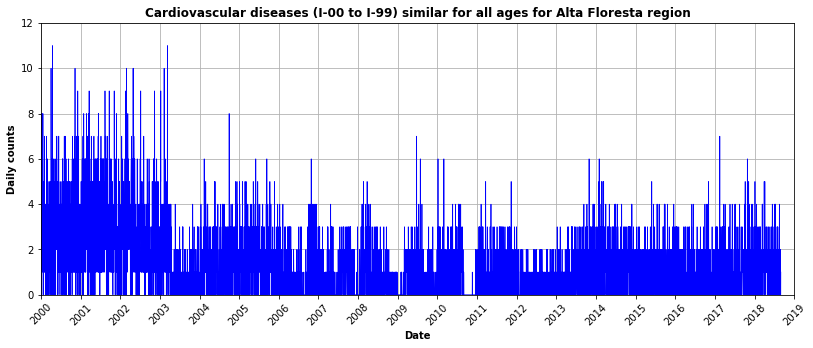

In [61]:
# Make a figure corresponding to the data selection above.
plt.figure(figsize=(13.5, 5))
plt.plot(COUNT.index, COUNT.COUNT.values, "-b", linewidth=0.75, markersize=10)
plt.title("Cardiovascular diseases (I-00 to I-99) similar for all ages " + \
          "for Alta Floresta region", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Daily counts", fontweight="bold")

# Adjustments.
plt.ylim((0, 12))
plt.xlim((pd.Timestamp("2000"), pd.Timestamp("2019")))
plt.xticks(pd.date_range("2000", "2019", freq="YS"), rotation=45)
plt.grid()
plt.savefig(output_folder + "alta_floresta5.jpg", dpi=400, bbox_inches="tight")